### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [96]:
data = pd.read_csv('data/coupons.csv')

In [97]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [98]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [99]:
# Check the number of missing values
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [101]:
# Check unique values in a specific column
print(data['car'].value_counts())
print(data['Bar'].value_counts())



Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [102]:
# Null values from these columns should be replaced with "Unknown"

# DROP THE 'car' COLUMN due to Extreme missingness
data = data.drop(columns=['car'])

habit_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for col in habit_columns:
    data[col] = data[col].fillna('Unknown')

# Ensure no null values remain
print(data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [103]:
# Calculate the proportion using the mean of the 'Y' column
acceptance_proportion = data['Y'].mean()

print(f"The proportion of customers who accepted the coupon is: {acceptance_proportion:.4f}")


The proportion of customers who accepted the coupon is: 0.5684


5. Use a bar plot to visualize the `coupon` column.

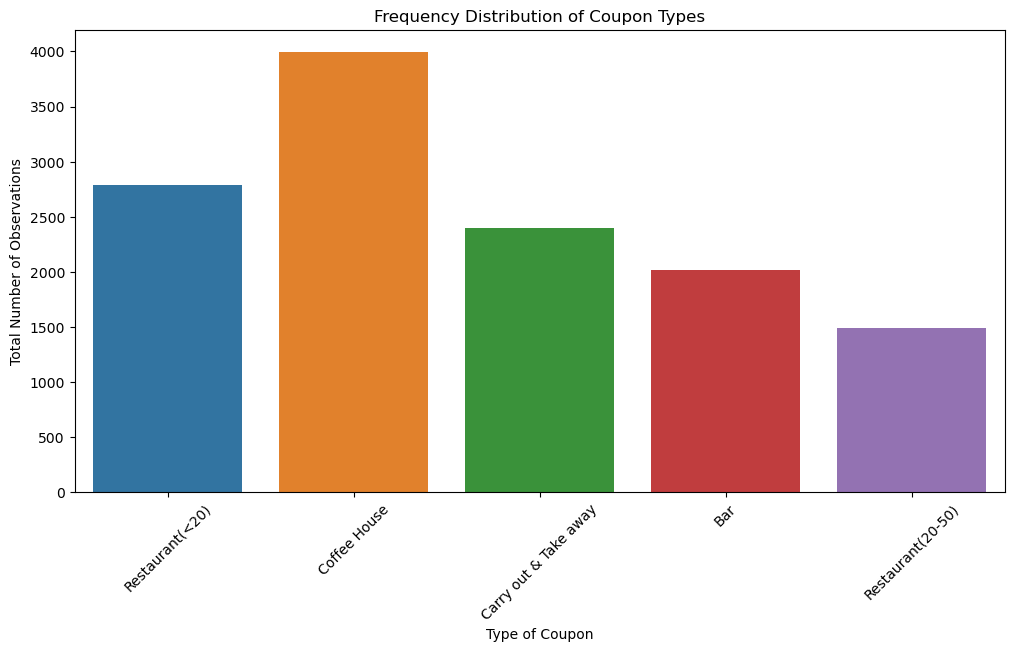

In [104]:
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.countplot(data=data, x='coupon')

# Add Labels
plt.title('Frequency Distribution of Coupon Types')
plt.xlabel('Type of Coupon')
plt.ylabel('Total Number of Observations')

# Label legibility
plt.xticks(rotation=45)

plt.show()

6. Use a histogram to visualize the temperature column.

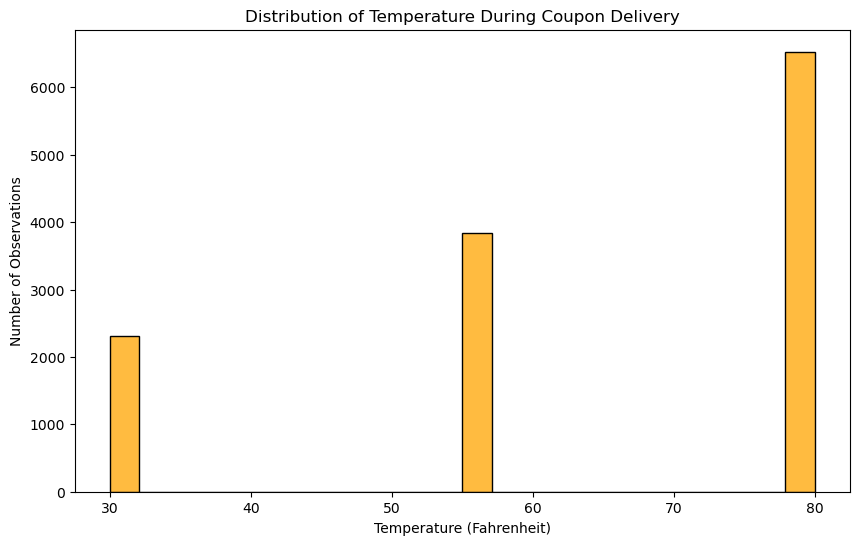

In [105]:
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(data=data, x='temperature', color='orange')

# Add Labels
plt.title('Distribution of Temperature During Coupon Delivery')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Number of Observations')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [107]:
# Segment the dataset to focus only on bar coupons

# Create new df containing only rows where the 'coupon' column is 'Bar'
bar_df = data[data['coupon'] == 'Bar'].copy()

# Verify the new df's dimensions and content
print(f"Total observations in the Bar Coupon subset: {len(bar_df)}")
print(bar_df['coupon'].unique())
bar_df.head()

Total observations in the Bar Coupon subset: 2017
['Bar']


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [108]:
# Calculate the proportion of accepted bar coupons
bar_acceptance_rate = bar_df['Y'].mean()

print(f"The proportion of bar coupons that were accepted is: {bar_acceptance_rate:.4f}")

The proportion of bar coupons that were accepted is: 0.4100


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [109]:
# Group A: 3 or fewer times a month ('never', 'less1', '1~3')
fewer_than_three = ['never', 'less1', '1~3']

# Group B: More than 3 times a month ('4~8', 'gt8')
more_than_three = ['4~8', 'gt8']

# Filter the bar_df and calculate the mean of 'Y' (the acceptance rate)
rate_fewer = bar_df[bar_df['Bar'].isin(fewer_than_three)]['Y'].mean()
rate_more = bar_df[bar_df['Bar'].isin(more_than_three)]['Y'].mean()

# Print results for interpretation
print(f"Acceptance rate (3 or fewer visits per month): {rate_fewer:.2%}")
print(f"Acceptance rate (More than 3 visits per month): {rate_more:.2%}")


Acceptance rate (3 or fewer visits per month): 37.06%
Acceptance rate (More than 3 visits per month): 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [110]:
# Group A = (Bar > 1/month) AND (Age > 25)
# Group B = Everyone else in the bar_df

# Group A
frequent_bar_goers = ['1~3', '4~8', 'gt8']

# Age categories: We filter for rows where age is NOT '21' or 'below21'
age_over_25_mask = ~bar_df['age'].isin(['21 to 25', 'below 21'])

# Filter the Bar DataFrame for Group A
group_a = bar_df[(bar_df['Bar'].isin(frequent_bar_goers)) & (age_over_25_mask)]


# Group B
group_b = bar_df[~bar_df.index.isin(group_a.index)]

# Calculate and compare acceptance rates
rate_a = group_a['Y'].mean()
rate_b = group_b['Y'].mean()

print(f"Acceptance Rate for Group A (Freq > 1, Age > 25): {rate_a:.2%}")
print(f"Acceptance Rate for Group B (All Others): {rate_b:.2%}")

Acceptance Rate for Group A (Freq > 1, Age > 25): 68.79%
Acceptance Rate for Group B (All Others): 29.35%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [111]:
# Group A: (Bar > 1/month) AND (Passenger != 'Kid(s)') AND (Occupation != 'Farming Fishing & Forestry')
# Group B: All others within the Bar Coupon subset

non_kid_passengers = ['Friend(s)', 'Alone', 'Partner']
excluded_occupation = 'Farming Fishing & Forestry'

# Group A
group_a = bar_df[
    (bar_df['Bar'].isin(frequent_bar_goers)) & 
    (bar_df['passanger'].isin(non_kid_passengers)) & 
    (bar_df['occupation'] != excluded_occupation)
]

# Group B
group_b = bar_df[~bar_df.index.isin(group_a.index)]

# Calculate and compare acceptance rates
rate_a = group_a['Y'].mean()
rate_b = group_b['Y'].mean()

# 5. Display results for your report
print(f"Acceptance Rate - Group A (Freq > 1, No Kids, Not Farming): {rate_a:.2%}")
print(f"Acceptance Rate - Group B (All Others): {rate_b:.2%}")

Acceptance Rate - Group A (Freq > 1, No Kids, Not Farming): 71.32%
Acceptance Rate - Group B (All Others): 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [116]:
# Group 1: (Bar > 1) AND (Passanger != Kid) AND (Not Widowed)
# Group 2: (Bar > 1) AND (Age < 30)
# Group 3: (Cheap Rest > 4) AND (Income < 50K)

under_30 = ['below 21', '21', '26']
frequent_cheap_rest = ['4~8', 'gt8']
low_income = ['Less than $12,500', '$12,500 - $24,999', '$25,000 - $37,499', '$37,500 - $49,999']


group_1 = bar_df[
    (bar_df['Bar'].isin(frequent_bar_goers)) & 
    (bar_df['passanger'] != 'Kid(s)') & 
    (bar_df['maritalStatus'] != 'Widowed')
]

group_2 = bar_df[
    (bar_df['Bar'].isin(frequent_bar_goers)) & 
    (bar_df['age'].isin(under_30))
]

group_3 = bar_df[
    (bar_df['RestaurantLessThan20'].isin(frequent_cheap_rest)) & 
    (bar_df['income'].isin(low_income))
]


# 3. Calculate Acceptance Rates (Mean of 'Y')
rate_1 = group_1['Y'].mean()
rate_2 = group_2['Y'].mean()
rate_3 = group_3['Y'].mean()

# 4. Display Results for Comparison
print(f"Group 1 Acceptance Rate (Active Social/Adults): {rate_1:.2%}")
print(f"Group 2 Acceptance Rate (Young Social Drivers): {rate_2:.2%}")
print(f"Group 3 Acceptance Rate (Frequent Budget Diners): {rate_3:.2%}")

#empty set
group_3.head()

Group 1 Acceptance Rate (Active Social/Adults): 71.32%
Group 2 Acceptance Rate (Young Social Drivers): 73.13%
Group 3 Acceptance Rate (Frequent Budget Diners): nan%


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [117]:
# Habit is the Strongest Predictor. 
# The most consistent factor across your high-acceptance groups (ranging from 62.31% to 71.32%) is the frequency of bar visits ("Freq > 1")

# "No Kids" and "Not Farming" achieved your highest observed acceptance rate of 71.32% 
# This suggests that drivers with fewer immediate responsibilities are more willing to accept the coupon

# The "Young Social Drivers" and "Active Social/Adults" had nearly identical rates (~62%)
# This suggests that once a social habit is established, age is less predictive than the habit itself.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [118]:
# Segment for Coffee House coupons
coffee_df = data[data['coupon'] == 'Coffee House'].copy()

In [119]:
# Calculate acceptance rates for each passenger category
passenger_rates = coffee_df.groupby('passanger')[['Y']].mean().sort_values(by='Y', ascending=False)
print(passenger_rates)

                  Y
passanger          
Friend(s)  0.596906
Partner    0.570492
Kid(s)     0.483092
Alone      0.437943


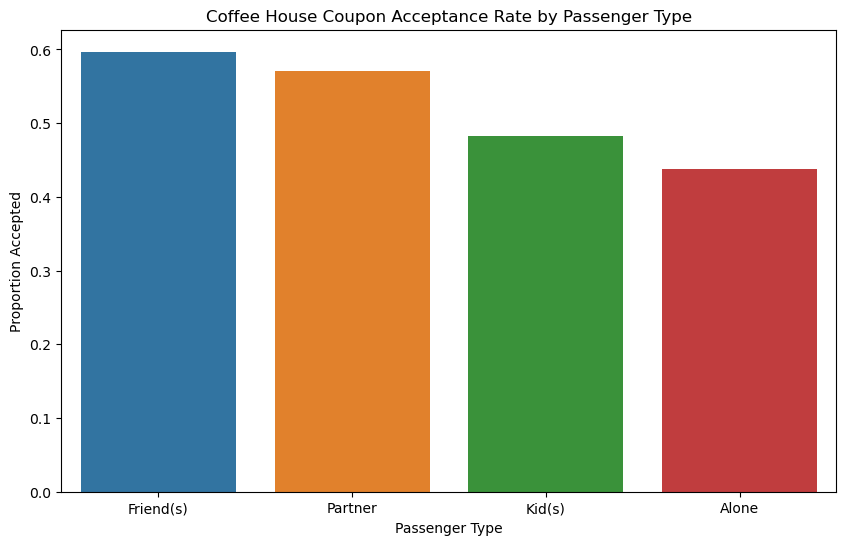

In [120]:
plt.figure(figsize=(10, 6))
sns.barplot(x=passenger_rates.index, y=passenger_rates['Y'])
plt.title('Coffee House Coupon Acceptance Rate by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Proportion Accepted')
plt.show()

In [121]:
# Hypothesis 
# Drivers with Friends or Partners have higher acceptance rates (~60%) for Coffee Houses 
# In contrast, driving Alone or with Kid(s) are less likely to acccept (~45%)